In [ ]:
import random
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
def draw_fun(original, modified, t_name):
  plt.subplot(121)
  plt.imshow(original, 'gray')
  plt.title('original')
  plt.subplot(122)
  plt.imshow(modified, 'gray')
  plt.title(t_name)
  plt.show()

На нарисованном вами при выполнении лабораторной работы 2 изображении найти выделить контуры всех прямоугольников синим цветом, круглых фигур – зеленым цветом. Используя моменты, посчитать и вывести площадь и периметр любого из указанных прямоугольников.

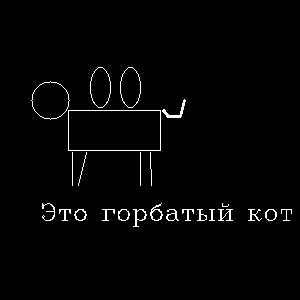

In [ ]:
canvas = np.zeros((300, 300, 3), dtype=np.uint8)
cv2.circle(canvas, (50, 100), 19, color=(255, 255, 255))
cv2.rectangle(canvas, (68, 110), (160, 150), color=(255, 255, 255))

cv2.line(canvas, (72, 152), (72, 185), color=(255, 255, 255))
cv2.line(canvas, (86, 152), (78, 185), color=(255, 255, 255))
cv2.line(canvas, (140, 152), (140, 185), color=(255, 255, 255))
cv2.line(canvas, (150, 152), (151, 185), color=(255, 255, 255))

cv2.ellipse(canvas, (100, 87), (20, 10), 90, 0, 360, color=(255, 255, 255))
cv2.ellipse(canvas, (130, 87), (20, 10), 90, 0, 360, color=(255, 255, 255))

pts = np.array([[163, 110], [168, 116], [180, 116], [184, 100]])
cv2.polylines(canvas, [pts], isClosed=False, color=(255, 255, 255), thickness=2)
cv2.putText(canvas, 'Это горбатый кот', (40, 220), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.8,color=(255, 255, 255))

cv2_imshow(canvas)
cat = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(cat, 127, 255, cv2.THRESH_BINARY)

In [ ]:
!curl https://i.imgur.com/FZWwGAi.png > /content/cat.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  755k  100  755k    0     0  2676k      0 --:--:-- --:--:-- --:--:-- 2669k


In [ ]:
cat_color = cv2.imread('/content/cat.png')
cat_color = cv2.resize(cat_color, (cat_color.shape[1] // 2, cat_color.shape[0] // 2))

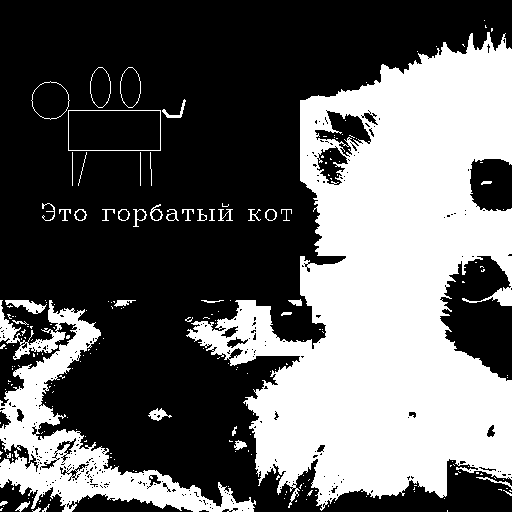

In [ ]:
cat = cv2.cvtColor(cat_color, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(cat, 150, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)


In [ ]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print([len(contour) for contour in contours])

[2, 6, 12, 1, 2, 18, 1, 1, 19, 4, 10, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 14, 2, 11, 1, 4, 2, 4, 4, 1, 1, 2, 7, 1, 1, 2, 2, 48, 1, 10, 3, 4, 4, 4, 2, 1, 1, 3, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 9, 4, 1, 1, 4, 2, 2, 25, 4, 6, 4, 4, 1, 1, 2, 1, 1, 15, 2, 1, 40, 6, 6, 1, 1, 2, 1, 3, 1, 3, 1, 1, 4, 1, 1, 12, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1, 4, 1, 1, 2, 2, 4, 1, 3, 1, 2, 1, 9, 1, 1, 2, 1, 2, 3, 6, 2, 1, 2, 11, 3, 5, 2, 2, 1, 1, 22, 4, 8, 22, 1, 2, 2, 11, 8, 1, 1, 1, 1, 4, 8, 1, 1, 1, 3, 1, 1, 14, 27, 1, 45, 7, 4, 4, 1449, 4, 4, 11, 4, 4, 4, 4, 4, 4, 6, 8, 4, 4, 18, 4, 8, 6, 4, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 9, 6, 4, 4, 4, 4, 6, 7, 9, 4, 4, 6, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 6, 4, 4, 6, 11, 4, 10, 4, 8, 9, 4, 4, 4, 6, 4, 6, 4, 4, 7, 4, 4, 6, 9, 4, 6, 8, 4, 4, 4, 8, 4, 7, 4, 4, 35, 4, 5, 4, 5, 4, 4, 6, 4, 5, 4, 6, 4, 6, 9, 4, 4, 14, 4, 6, 4, 9, 4, 4, 6, 4, 4, 9, 4, 6, 4, 25, 6, 5, 4, 6, 4, 4, 4, 29, 4, 6, 4, 4, 4, 4, 4, 6, 4, 4, 6, 5, 4, 31, 6, 4, 6, 6, 6, 6, 6, 4, 4, 6, 6, 4, 4, 4, 14, 4

Площадь прямоугольника: 0.5, периметр 5.414213538169861, момент контура 0.5.


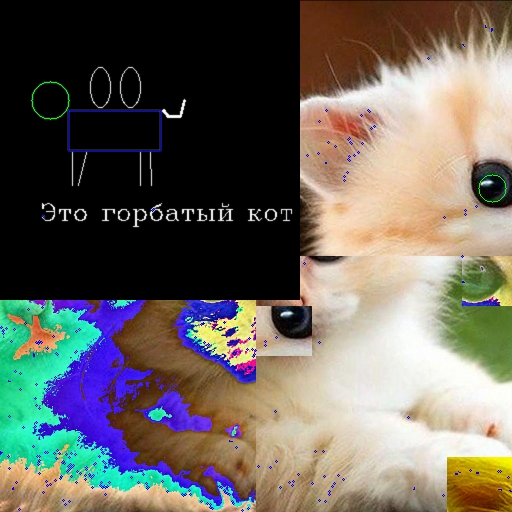

In [ ]:
img = cat_color.copy()


for contour in contours:
  if len(contour) == 4:
    cv2.drawContours(img, [contour], -1, (255, 0, 0), 0)
    M = cv2.moments(contour)
    S = cv2.contourArea(contour)
    P = cv2.arcLength(contour, True)

circles = cv2.HoughCircles(cat, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=10, param2=30, minRadius=0, maxRadius=20)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 1)

print(f"Площадь прямоугольника: {S}, периметр {P}, момент контура {M['m00']}.")
cv2_imshow(img)

На произвольном изображении для любой невыпуклой фигуры найти и нарисовать выпуклый контур (Convex Hull), а также дефекты этого контура (Convexity Defects). Около любых непрямоугольных объектов описать: прямоугольник наименьшей площади, круг и эллипс, нарисовать ось этой фигуры.

In [ ]:
!curl https://t3.ftcdn.net/jpg/01/65/62/92/360_F_165629234_RU2TizwObXvESLAXGnSH76JjUsNsaQKr.jpg > /content/star.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8487  100  8487    0     0  26246      0 --:--:-- --:--:-- --:--:-- 26439


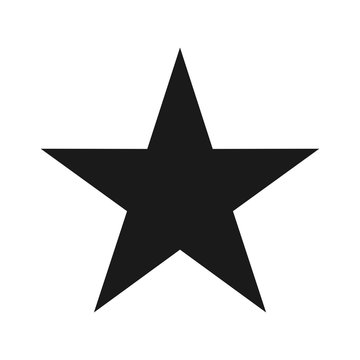

In [ ]:
star = cv2.imread("/content/star.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(star)

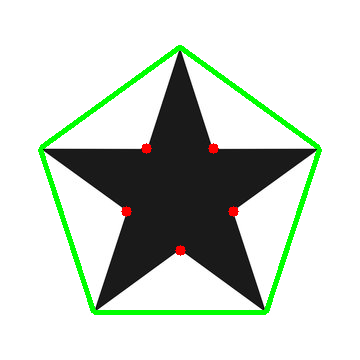

In [ ]:
_, thresh = cv2.threshold(star, 200, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[1]
drawing = pict = cv2.imread("/content/star.jpg") # Цветное изображение
hull = cv2.convexHull(cnt, returnPoints=False)
defects = cv2.convexityDefects(cnt, hull)
for i in range(defects.shape[0]):
  s,e,f,d = defects[i,0]
  start = tuple(cnt[s][0])
  end = tuple(cnt[e][0])
  far = tuple(cnt[f][0])
  cv2.line(pict, start, end, [0,255,0], 3) # Контуры с дефектами
  cv2.circle(pict, far, 5, [0,0,255], -1) # Наиболее удаленная точка от контура

cv2_imshow(pict)


In [ ]:
!curl https://images.rawpixel.com/image_png_800/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDI0LTA4L3JtMjA5NS1hbS0xNDItcF8xLnBuZw.png > /content/arrow.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 54452    0 54452    0     0   199k      0 --:--:-- --:--:-- --:--:--  199k


Около любых непрямоугольных объектов описать: прямоугольник наименьшей площади, круг и эллипс, нарисовать ось этой фигуры.

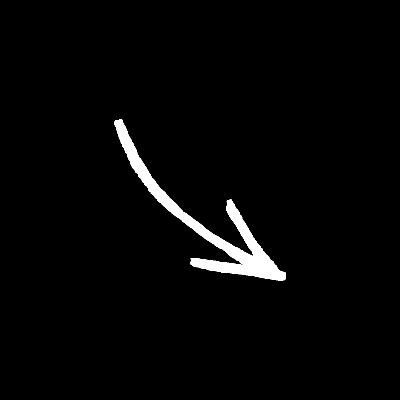

In [ ]:
arrow = cv2.imread('/content/arrow.png', cv2.IMREAD_GRAYSCALE)
_, arrow = cv2.threshold(arrow, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5, 5), np.uint8)
arrow = cv2.dilate(arrow, kernel, iterations=1)

resized_arrow = np.zeros((arrow.shape[0] * 2, arrow.shape[1] * 2), dtype=np.uint8)
x_offset = (resized_arrow.shape[0] - arrow.shape[0]) // 2
y_offset = (resized_arrow.shape[1] - arrow.shape[1]) // 2

resized_arrow[y_offset:y_offset+arrow.shape[1], x_offset:x_offset+arrow.shape[0]] = arrow
arrow = resized_arrow
arrow = cv2.resize(arrow, (arrow.shape[0] // 4, arrow.shape[1] // 4))
cv2_imshow(arrow)


In [ ]:
color_arrow = cv2.cvtColor(arrow, cv2.COLOR_GRAY2BGR)
contours, hierarchy = cv2.findContours(arrow, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
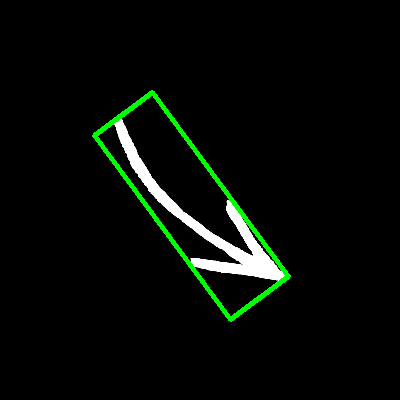

In [ ]:
canvas = color_arrow.copy()
rect = cv2.minAreaRect(contours[0]) # (center(x,y), (width, height), angle of rotation).
box = cv2.boxPoints(rect)
box = np.intp(box)
cv2.drawContours(canvas, [box], 0, (0,255,0), 3)

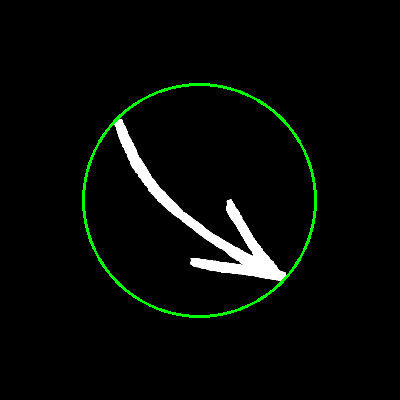

In [ ]:
canvas = color_arrow.copy()

(x, y), radius = cv2.minEnclosingCircle(contours[0]) # Находит круг минимальной площади, охватывающий двумерный набор точек.
center = (int(x), int(y))
radius = int(radius)
cv2.circle(canvas, center, radius, (0, 255, 0), 2)
cv2_imshow(canvas)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
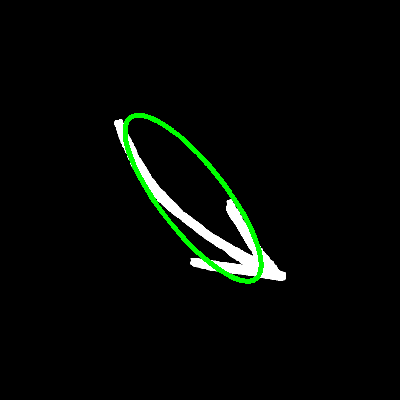

In [ ]:
canvas = color_arrow.copy()
ellipse = cv2.fitEllipse(contours[0])
cv2.ellipse(canvas, ellipse, (0,255,0), 4)

<ipython-input-54-026db4da06dd>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-xp * vy / vx) + yp)
<ipython-input-54-026db4da06dd>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols - xp) * vy / vx) + yp)


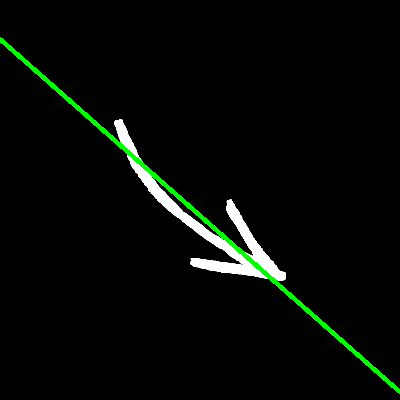

In [ ]:
canvas = color_arrow.copy()
rows, cols = arrow.shape[:2]
[vx, vy, xp, yp]=cv2.fitLine(contours[0], cv2.DIST_L2, 0, 0.01, 0.01)
lefty = int((-xp * vy / vx) + yp)
righty = int(((cols - xp) * vy / vx) + yp)
cv2.line(canvas, (cols - 1, righty), (0, lefty), (0, 255, 0), 4)
cv2_imshow(canvas)

Найти наибольший по площади контур, описывающий только внутренности вагона на изображении railway_carriage.jpg (у преподавателя).

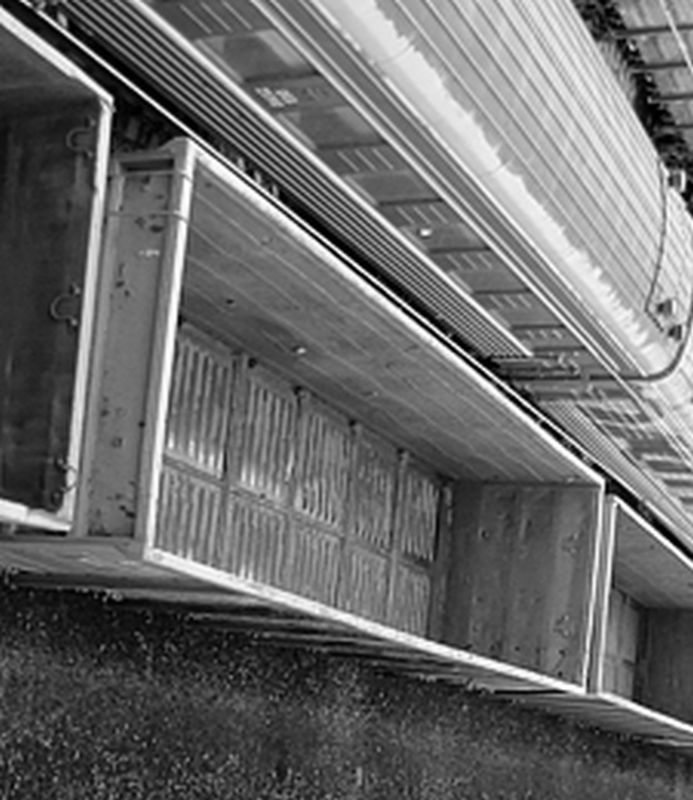

In [ ]:
railway_carriage = cv2.imread("/content/drive/MyDrive/ForColab/railway_carriage.jpg", 0)
cv2_imshow(railway_carriage)

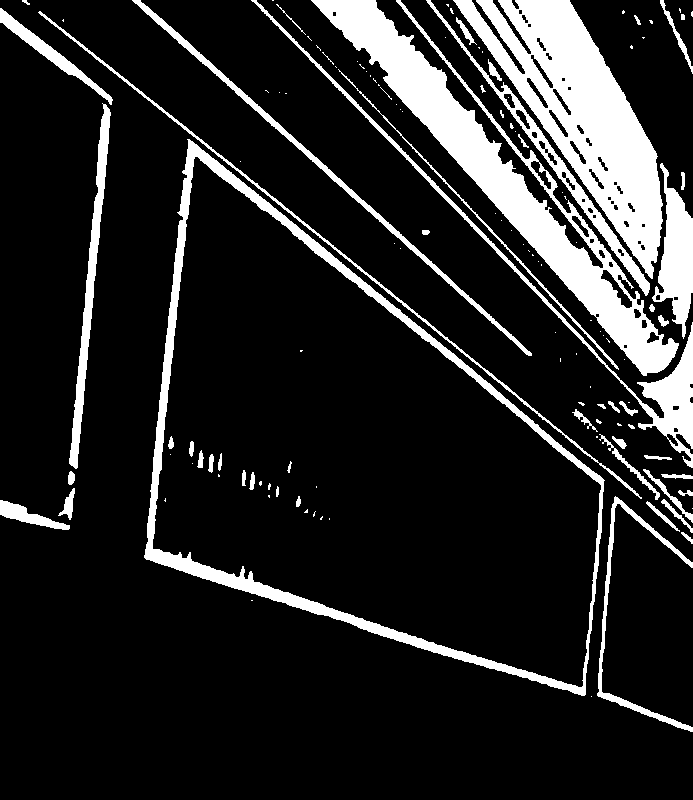

In [ ]:
_, thresh = cv2.threshold(railway_carriage, 180, 255, cv2.THRESH_BINARY)
# cv2_imshow(thresh)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

(1, 186, 4)
Найдено 186 контуров.
Размер самого большого контура: 133489.0.


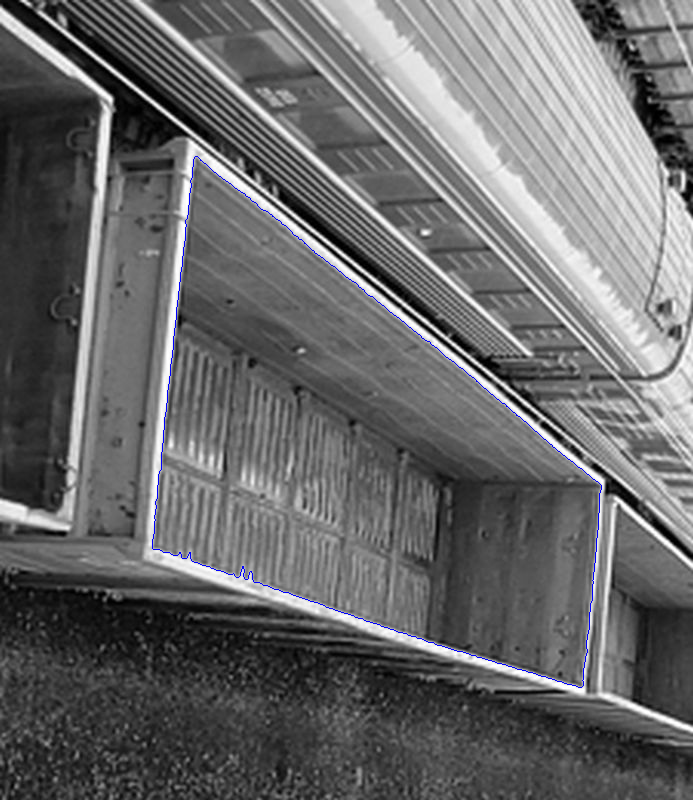

In [ ]:
color_railway_carriage = cv2.cvtColor(railway_carriage, cv2.COLOR_GRAY2BGR)
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(f"Найдено {len(contours)} контуров.")

index_of_biggest_reactangle = 0
biggest_contour = contours[0]
size_of_biggest_reactangle = cv2.contourArea(biggest_contour)

for i in range(1, len(contours)):
  if cv2.contourArea(contours[i]) > size_of_biggest_reactangle and hierarchy[0][i][3] != -1:
    index_of_biggest_reactangle = i
    size_of_biggest_reactangle = cv2.contourArea(contours[i])
    biggest_contour = contours[i]

print(f"Размер самого большого контура: {size_of_biggest_reactangle}.")

cv2.drawContours(color_railway_carriage, [biggest_contour], -1, (255, 0, 0), 0)
cv2_imshow(color_railway_carriage)